<a href="https://colab.research.google.com/github/Abhinav1018Yadav/Heart-Disease-Prediction-Model/blob/main/Abhinav_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import joblib
from tkinter import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Heart Prediction Model/heart.csv')

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data .duplicated().any()

In [ ]:
data_dup

False

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [ ]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [ ]:
data['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Standard Scaler**

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [ ]:
x = data.drop('output',axis=1)

In [ ]:
y = data['output']

**Train and test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

**LogisticRegression**

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict (x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.8360655737704918

**SVM**

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8852459016393442

**KNN**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3= knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [ ]:
score = []
for k in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

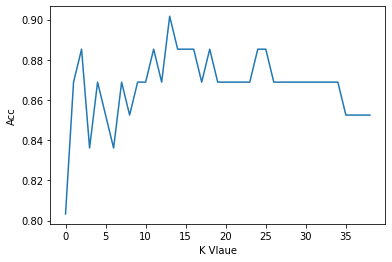

In [ ]:
plt.plot(score)
plt.xlabel("K Vlaue")
plt.ylabel("Acc")
plt.show()


In [ ]:
 knn=KNeighborsClassifier(n_neighbors=2)
 knn.fit(x_train,y_train)
 y_pred=knn.predict(x_test)
 accuracy_score(y_test,y_pred)

0.8688524590163934

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Heart Prediction Model/heart.csv')

In [ ]:
data = data.drop_duplicates()

In [ ]:
x= data.drop('output',axis=1)
y= data['output']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

**DecisionTreeClassifier**

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4= dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)


0.8032786885245902

**RandomForestClassfier**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5= rf.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [ ]:
final_data= pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                         'ACC':[accuracy_score(y_test,y_pred1)*100,
                               accuracy_score(y_test,y_pred2)*100,
                               accuracy_score(y_test,y_pred3)*100,
                               accuracy_score(y_test,y_pred4)*100,
                               accuracy_score(y_test,y_pred5)*100]})

In [ ]:
final_data

,Models,ACC
0,LR,83.606557
1,SVM,88.524590
2,KNN,86.885246
3,DT,80.327869
4,RF,85.245902


**Graph**

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [ ]:
x=data.drop('output',axis=1)
y=data['output']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()
rf.fit(x,y)

In [ ]:
import pandas as pd

**Test 1**

In [ ]:
new_data = pd.DataFrame({
    'age':25,
    'sex':1,
    'cp':0,
    'trtbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalachh':168,
    'exng':0,
    'oldpeak':1.0,
    'slp':2,
    'caa':2,
    'thall':3,
    
},index=[0])

In [ ]:
new_data

In [ ]:
p = rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

**Test 2 **

In [ ]:
new_data = pd.DataFrame({
    'age':65,
    'sex':1,
    'cp':4,
    'trtbps':125,
    'chol':230,
    'fbs':0,
    'restecg':1,
    'thalachh':150,
    'exng':0,
    'oldpeak':1.0,
    'slp':2,
    'caa':2,
    'thall':3,
    
},index=[0])

In [ ]:
p = rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

**GUI**

In [ ]:
#@title Input Patient Attributes
age = 25 #@param {type:"integer"}
sex = 0 #@param {type:"integer"}
cp = 0 #@param {type:"integer"}
trtbps = 125 #@param {type:"integer"}
chol = 260 #@param {type:"integer"}
fbs = 0 #@param {type:"integer"}
restecg = 1 #@param {type:"integer"}
thalachh = 150 #@param {type:"integer"}
exng = 0 #@param {type:"integer"}
oldpeak = 1.0 #@param {type:"number"}
slp = 2 #@param {type:"integer"}
caa = 2 #@param {type:"integer"}
thall = 3 #@param {type:"integer"}



In [ ]:
new_data = pd.DataFrame({
    'age':age,
    'sex':sex,
    'cp':cp,
    'trtbps':trtbps,
    'chol':chol,
    'fbs':fbs,
    'restecg':restecg,
    'thalachh':thalachh,
    'exng':exng,
    'oldpeak':oldpeak,
    'slp':slp,
    'caa':caa,
    'thall':thall,
    
},index=[0])

In [ ]:
p = rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')